This is No. 1 field 
The initial position is : [500, -10]
The angle is : 0.16755160819145562
The constant(strength) of this dipole field is: 5
This is No. 2 field 
The initial position is : [-1000, 10]
The angle is : -0.5340707511102649
The constant(strength) of this dipole field is: 125


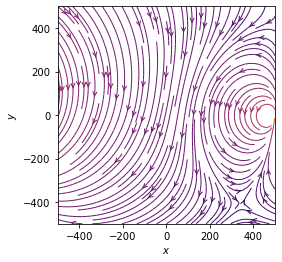

In [10]:
import numpy as np
import dfield_generator as dg
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

nx, ny = 500, 500
XMAX, YMAX = 500, 500
x = np.linspace(-XMAX, XMAX, nx)
y = np.linspace(-YMAX, YMAX, ny)
X, Y = np.meshgrid(x, y)



polar1 = dg.DipoleMoment(name = 1, position = [500,-10],
                         alpha= np.radians(9.6),
                         B0 = 5)

polar2 = dg.DipoleMoment(name = 2, position = [-1000,10],
                         alpha= np.radians(-30.6),
                         B0 =125)



Bx_1, By_1 = polar1.get_field(X,Y)


Bx_2, By_2 = polar2.get_field(X,Y)
Bx, By = Bx_1 + Bx_2, By_1 + By_2


fig, ax = plt.subplots()

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Bx, By))
ax.streamplot(x, y, Bx, By, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=1.5, arrowstyle='->', arrowsize=1)


ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-XMAX, XMAX)
ax.set_ylim(-YMAX, YMAX)
ax.set_aspect('equal')
plt.show()

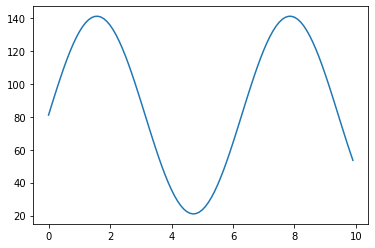

In [12]:
t= np.arange(0,10,0.1)
plt.plot(t,60 + 60*(np.sin(t)))

MovieWriter imagemagick unavailable; using Pillow instead.


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


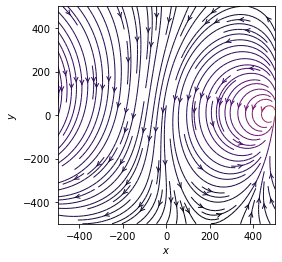

In [1]:
from dfield_generator import *

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation


nx, ny = 500, 500
XMAX, YMAX = 500, 500
xx = np.linspace(-XMAX, XMAX, nx)
yy = np.linspace(-YMAX, YMAX, ny)
X, Y = np.meshgrid(xx, yy)
Bx,By = get_field_t(0)

fig, ax = plt.subplots()
color = 2 * np.log(np.hypot(Bx, By))
ax.streamplot(xx, yy, Bx, By, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=1.5, arrowstyle='->', arrowsize=1)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-XMAX, XMAX)
ax.set_ylim(-YMAX, YMAX)
ax.set_aspect('equal')

def animate(iter):
    ax.collections = [] # clear lines streamplot
    ax.patches = [] # clear arrowheads streamplot
    Bx,By = get_field_t(iter*0.1)
    
    color = 2 * np.log(np.hypot(Bx, By))
    stream = ax.streamplot(xx, yy, Bx, By, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=1.5, arrowstyle='->', arrowsize=1)
    print(iter)
    return stream

anim =   animation.FuncAnimation(fig, animate, frames=100, interval=50, blit=False, repeat=False)
anim.save('./animation.gif', writer='imagemagick', fps=60)

# anim =   animation.FuncAnimation(fig, animate,interval=50, blit=True)
# anim.save('./animation.mp4', writer='ffmpeg', fps=60)
# plt.show()